Name: Betül Biçer

ID: 201101055

Course: 470 Proje: ATP Tenis Maçı Tahmini

# LIBRARIES

In [1]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, precision_score, recall_score, roc_curve, auc
from sklearn.preprocessing import label_binarize

from itertools import cycle
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.tree import plot_tree
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [2]:
import pandas as pd
import numpy as np
import os
import glob
import matplotlib.pyplot as plt
import seaborn as sns
import shap
from sklearn.tree import DecisionTreeClassifier

shap.initjs()

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


# Exploratory Data Analysis (EDA)

In [3]:
data_dir = "tennis_atp/"
csv_files = glob.glob(os.path.join(data_dir, "atp_matches_2*.csv"))#directorydeki butun csv filelari listeler
dataframes = [pd.read_csv(file) for file in csv_files]
d = pd.concat(dataframes, ignore_index=True)

In [4]:

pd.set_option('display.max_columns', None)
d.info(), d.head()


print(d.describe())
d

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73247 entries, 0 to 73246
Data columns (total 49 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tourney_id          73247 non-null  object 
 1   tourney_name        73247 non-null  object 
 2   surface             73194 non-null  object 
 3   draw_size           73247 non-null  int64  
 4   tourney_level       73247 non-null  object 
 5   tourney_date        73247 non-null  int64  
 6   match_num           73247 non-null  int64  
 7   winner_id           73247 non-null  int64  
 8   winner_seed         30444 non-null  object 
 9   winner_entry        9229 non-null   object 
 10  winner_name         73247 non-null  object 
 11  winner_hand         73240 non-null  object 
 12  winner_ht           71351 non-null  float64
 13  winner_ioc          73247 non-null  object 
 14  winner_age          73240 non-null  float64
 15  loser_id            73247 non-null  int64  
 16  lose

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,winner_name,winner_hand,winner_ht,winner_ioc,winner_age,loser_id,loser_seed,loser_entry,loser_name,loser_hand,loser_ht,loser_ioc,loser_age,score,best_of,round,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
0,2000-301,Auckland,Hard,32,A,20000110,1,103163,1.0,NaN,Tommy Haas,R,188.0,GER,21.7,101543,NaN,NaN,Jeff Tarango,L,180.0,USA,31.1,7-5 4-6 7-5,3,R32,108.0,18.0,4.0,96.0,49.0,39.0,28.0,17.0,3.0,5.0,7.0,8.0,106.0,55.0,39.0,29.0,17.0,4.0,7.0,11.0,1612.0,63.0,595.0
1,2000-301,Auckland,Hard,32,A,20000110,2,102607,NaN,Q,Juan Balcells,R,190.0,ESP,24.5,102644,NaN,NaN,Franco Squillari,L,183.0,ARG,24.3,7-5 7-5,3,R32,85.0,5.0,3.0,76.0,52.0,39.0,13.0,12.0,5.0,6.0,5.0,10.0,74.0,32.0,25.0,18.0,12.0,3.0,6.0,211.0,157.0,49.0,723.0
2,2000-301,Auckland,Hard,32,A,20000110,3,103252,NaN,NaN,Alberto Martin,R,175.0,ESP,21.3,102238,NaN,NaN,Alberto Berasategui,R,173.0,ESP,26.5,6-3 6-1,3,R32,56.0,0.0,0.0,55.0,35.0,25.0,12.0,8.0,1.0,1.0,0.0,6.0,56.0,33.0,20.0,7.0,8.0,7.0,11.0,48.0,726.0,59.0,649.0
3,2000-301,Auckland,Hard,32,A,20000110,4,103507,7.0,NaN,Juan Carlos Ferrero,R,183.0,ESP,19.9,103819,NaN,NaN,Roger Federer,R,185.0,SUI,18.4,6-4 6-4,3,R32,68.0,5.0,1.0,53.0,28.0,26.0,15.0,10.0,0.0,0.0,11.0,2.0,70.0,43.0,29.0,14.0,10.0,6.0,8.0,45.0,768.0,61.0,616.0
4,2000-301,Auckland,Hard,32,A,20000110,5,102103,NaN,Q,Michael Sell,R,180.0,USA,27.3,102765,4.0,NaN,Nicolas Escude,R,185.0,FRA,23.7,0-6 7-6(7) 6-1,3,R32,115.0,1.0,2.0,98.0,66.0,39.0,14.0,13.0,6.0,11.0,8.0,8.0,92.0,46.0,34.0,18.0,12.0,5.0,9.0,167.0,219.0,34.0,873.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73242,2024-M-DC-2024-WG2-PO-URU-MDA-01,Davis Cup WG2 PO: URU vs MDA,Clay,4,D,20240203,5,212051,NaN,NaN,Joaquin Aguilar Cardozo,U,NaN,URU,18.8,209943,NaN,NaN,Ilya Snitari,U,NaN,MDA,21.8,6-1 6-0,3,RR,77.0,0.0,0.0,36.0,22.0,15.0,10.0,7.0,1.0,1.0,1.0,1.0,61.0,30.0,17.0,7.0,6.0,8.0,14.0,1109.0,8.0,740.0,34.0
73243,2024-M-DC-2024-WG2-PO-VIE-RSA-01,Davis Cup WG2 PO: VIE vs RSA,Hard,4,D,20240202,1,122533,NaN,NaN,Nam Hoang Ly,R,NaN,VIE,26.9,202475,NaN,NaN,Philip Henning,R,NaN,RSA,23.2,6-3 6-4,3,RR,131.0,1.0,1.0,86.0,60.0,40.0,13.0,10.0,8.0,9.0,2.0,1.0,56.0,41.0,25.0,6.0,9.0,1.0,4.0,554.0,67.0,748.0,32.0
73244,2024-M-DC-2024-WG2-PO-VIE-RSA-01,Davis Cup WG2 PO: VIE vs RSA,Hard,4,D,20240202,2,144748,NaN,NaN,Kris Van Wyk,U,NaN,RSA,27.3,144775,NaN,NaN,Linh Giang Trinh,R,183.0,VIE,26.4,4-6 6-3 4-0,3,RR,131.0,4.0,2.0,76.0,46.0,32.0,10.0,12.0,6.0,11.0,0.0,2.0,71.0,51.0,25.0,7.0,11.0,5.0,12.0,416.0,109.0,NaN,NaN
73245,2024-M-DC-2024-WG2-PO-VIE-RSA-01,Davis Cup WG2 PO: VIE vs RSA,Hard,4,D,20240202,4,122533,NaN,NaN,Nam Hoang Ly,R,NaN,VIE,26.9,144748,NaN,NaN,Kris Van Wyk,U,NaN,RSA,27.3,6-4 3-6 6-3,3,RR,159.0,0.0,1.0,84.0,61.0,41.0,13.0,14.0,2.0,5.0,5.0,3.0,86.0,51.0,32.0,17.0,14.0,5.0,9.0,554.0,67.0,416.0,109.0


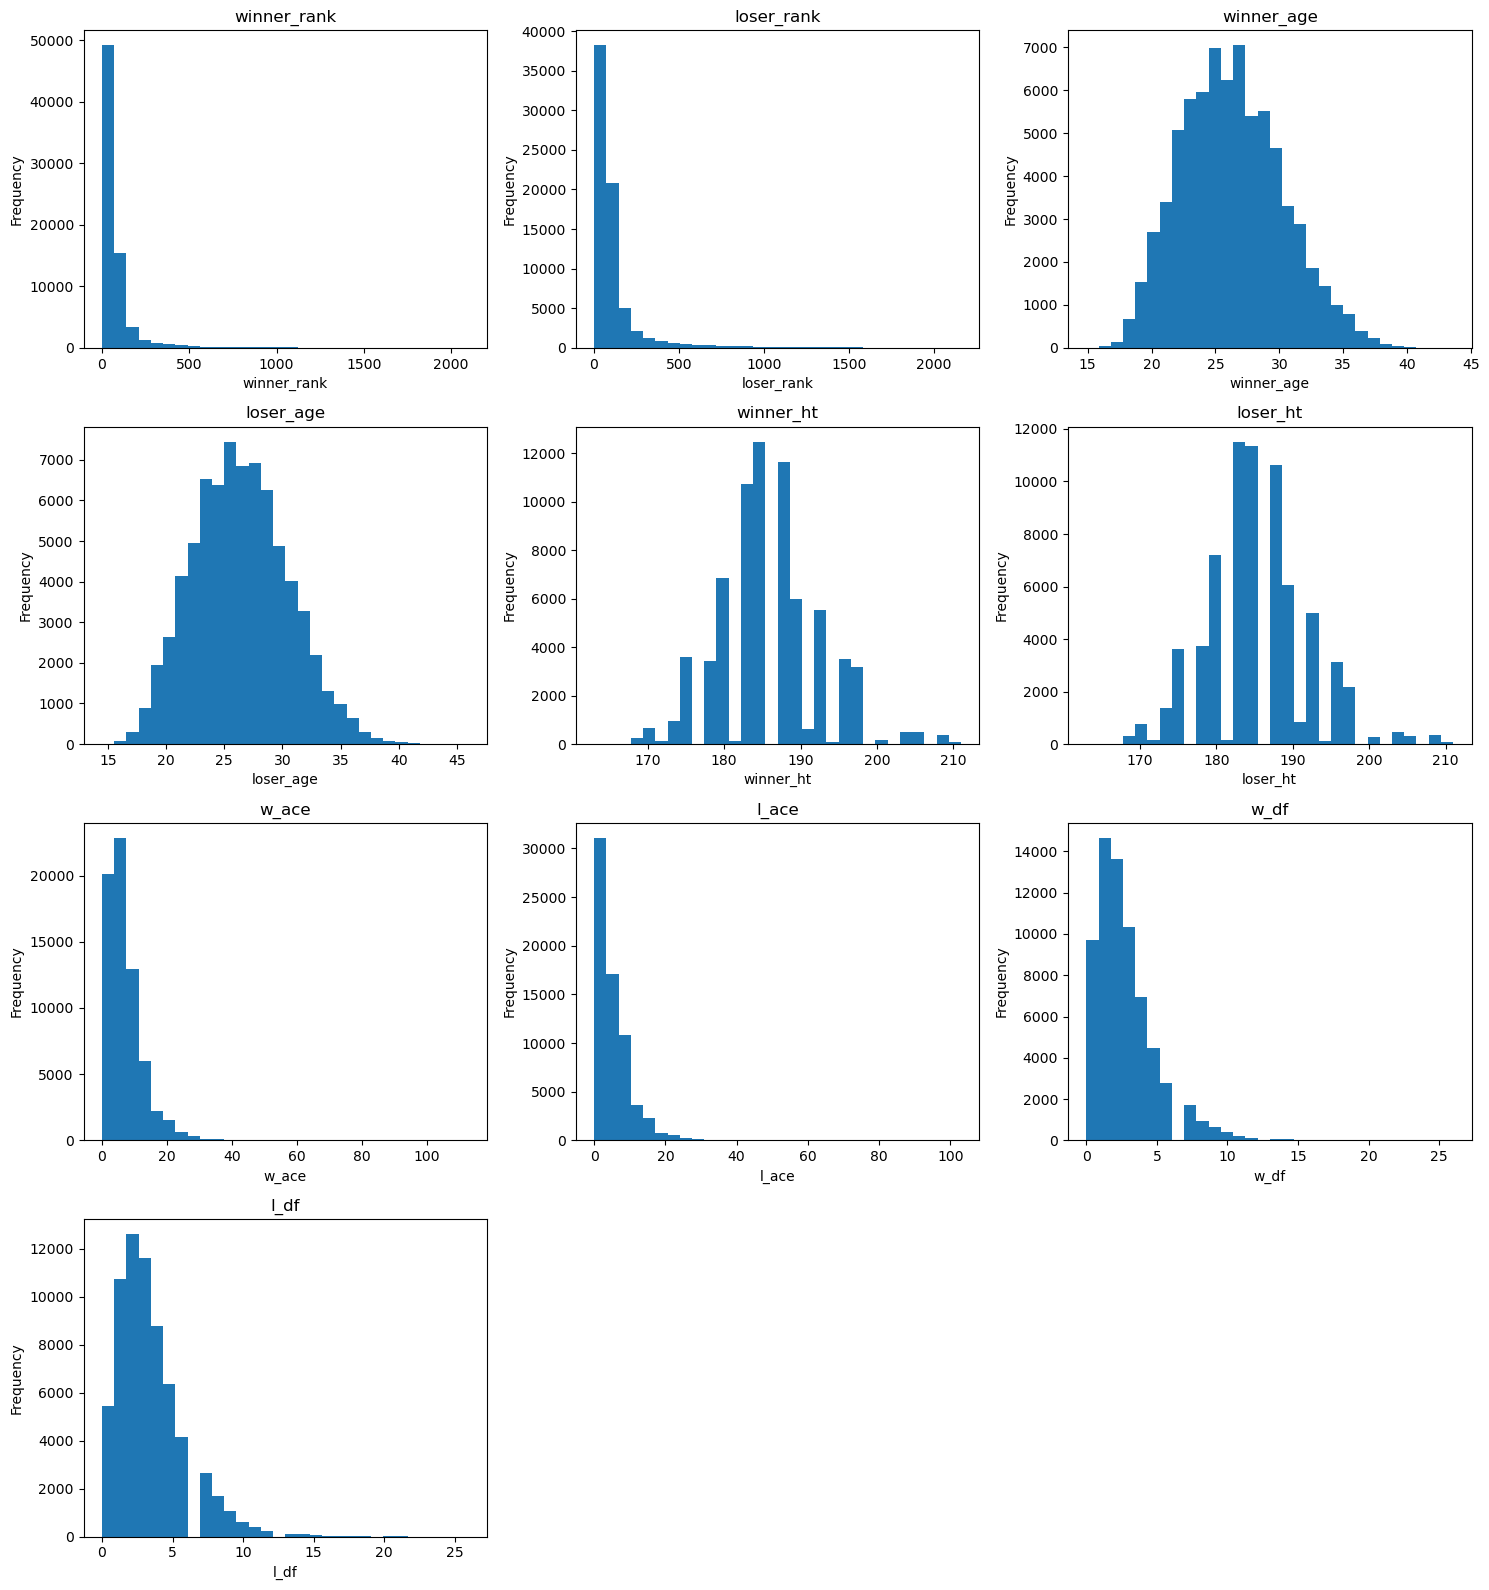

In [5]:
features = ['winner_rank', 'loser_rank', 'winner_age', 'loser_age', 'winner_ht', 'loser_ht', 'w_ace', 'l_ace','w_df','l_df']
num_plots = len(features)
cols = 3
rows = (num_plots // cols) + (num_plots % cols > 0)

plt.figure(figsize=(cols * 5, rows * 4))

for i, feature in enumerate(features):
    plt.subplot(rows, cols, i + 1)
    d[feature].plot(kind='hist', bins=30, title=feature)
    plt.xlabel(feature)

plt.tight_layout()
plt.show()

In [6]:
categorical_features = ['surface', 'tourney_level', 'winner_hand', 'loser_hand']
for feature in categorical_features:
    print(f"{feature} degeri:")
    print(d[feature].value_counts())
    print("\n")

surface degeri:
surface
Hard      39893
Clay      23887
Grass      7375
Carpet     2039
Name: count, dtype: int64


tourney_level degeri:
tourney_level
A    40068
M    13738
G    12192
D     6842
F      407
Name: count, dtype: int64


winner_hand degeri:
winner_hand
R    63777
L     8962
U      495
A        6
Name: count, dtype: int64


loser_hand degeri:
loser_hand
R    62387
L     9633
U     1180
A        5
Name: count, dtype: int64




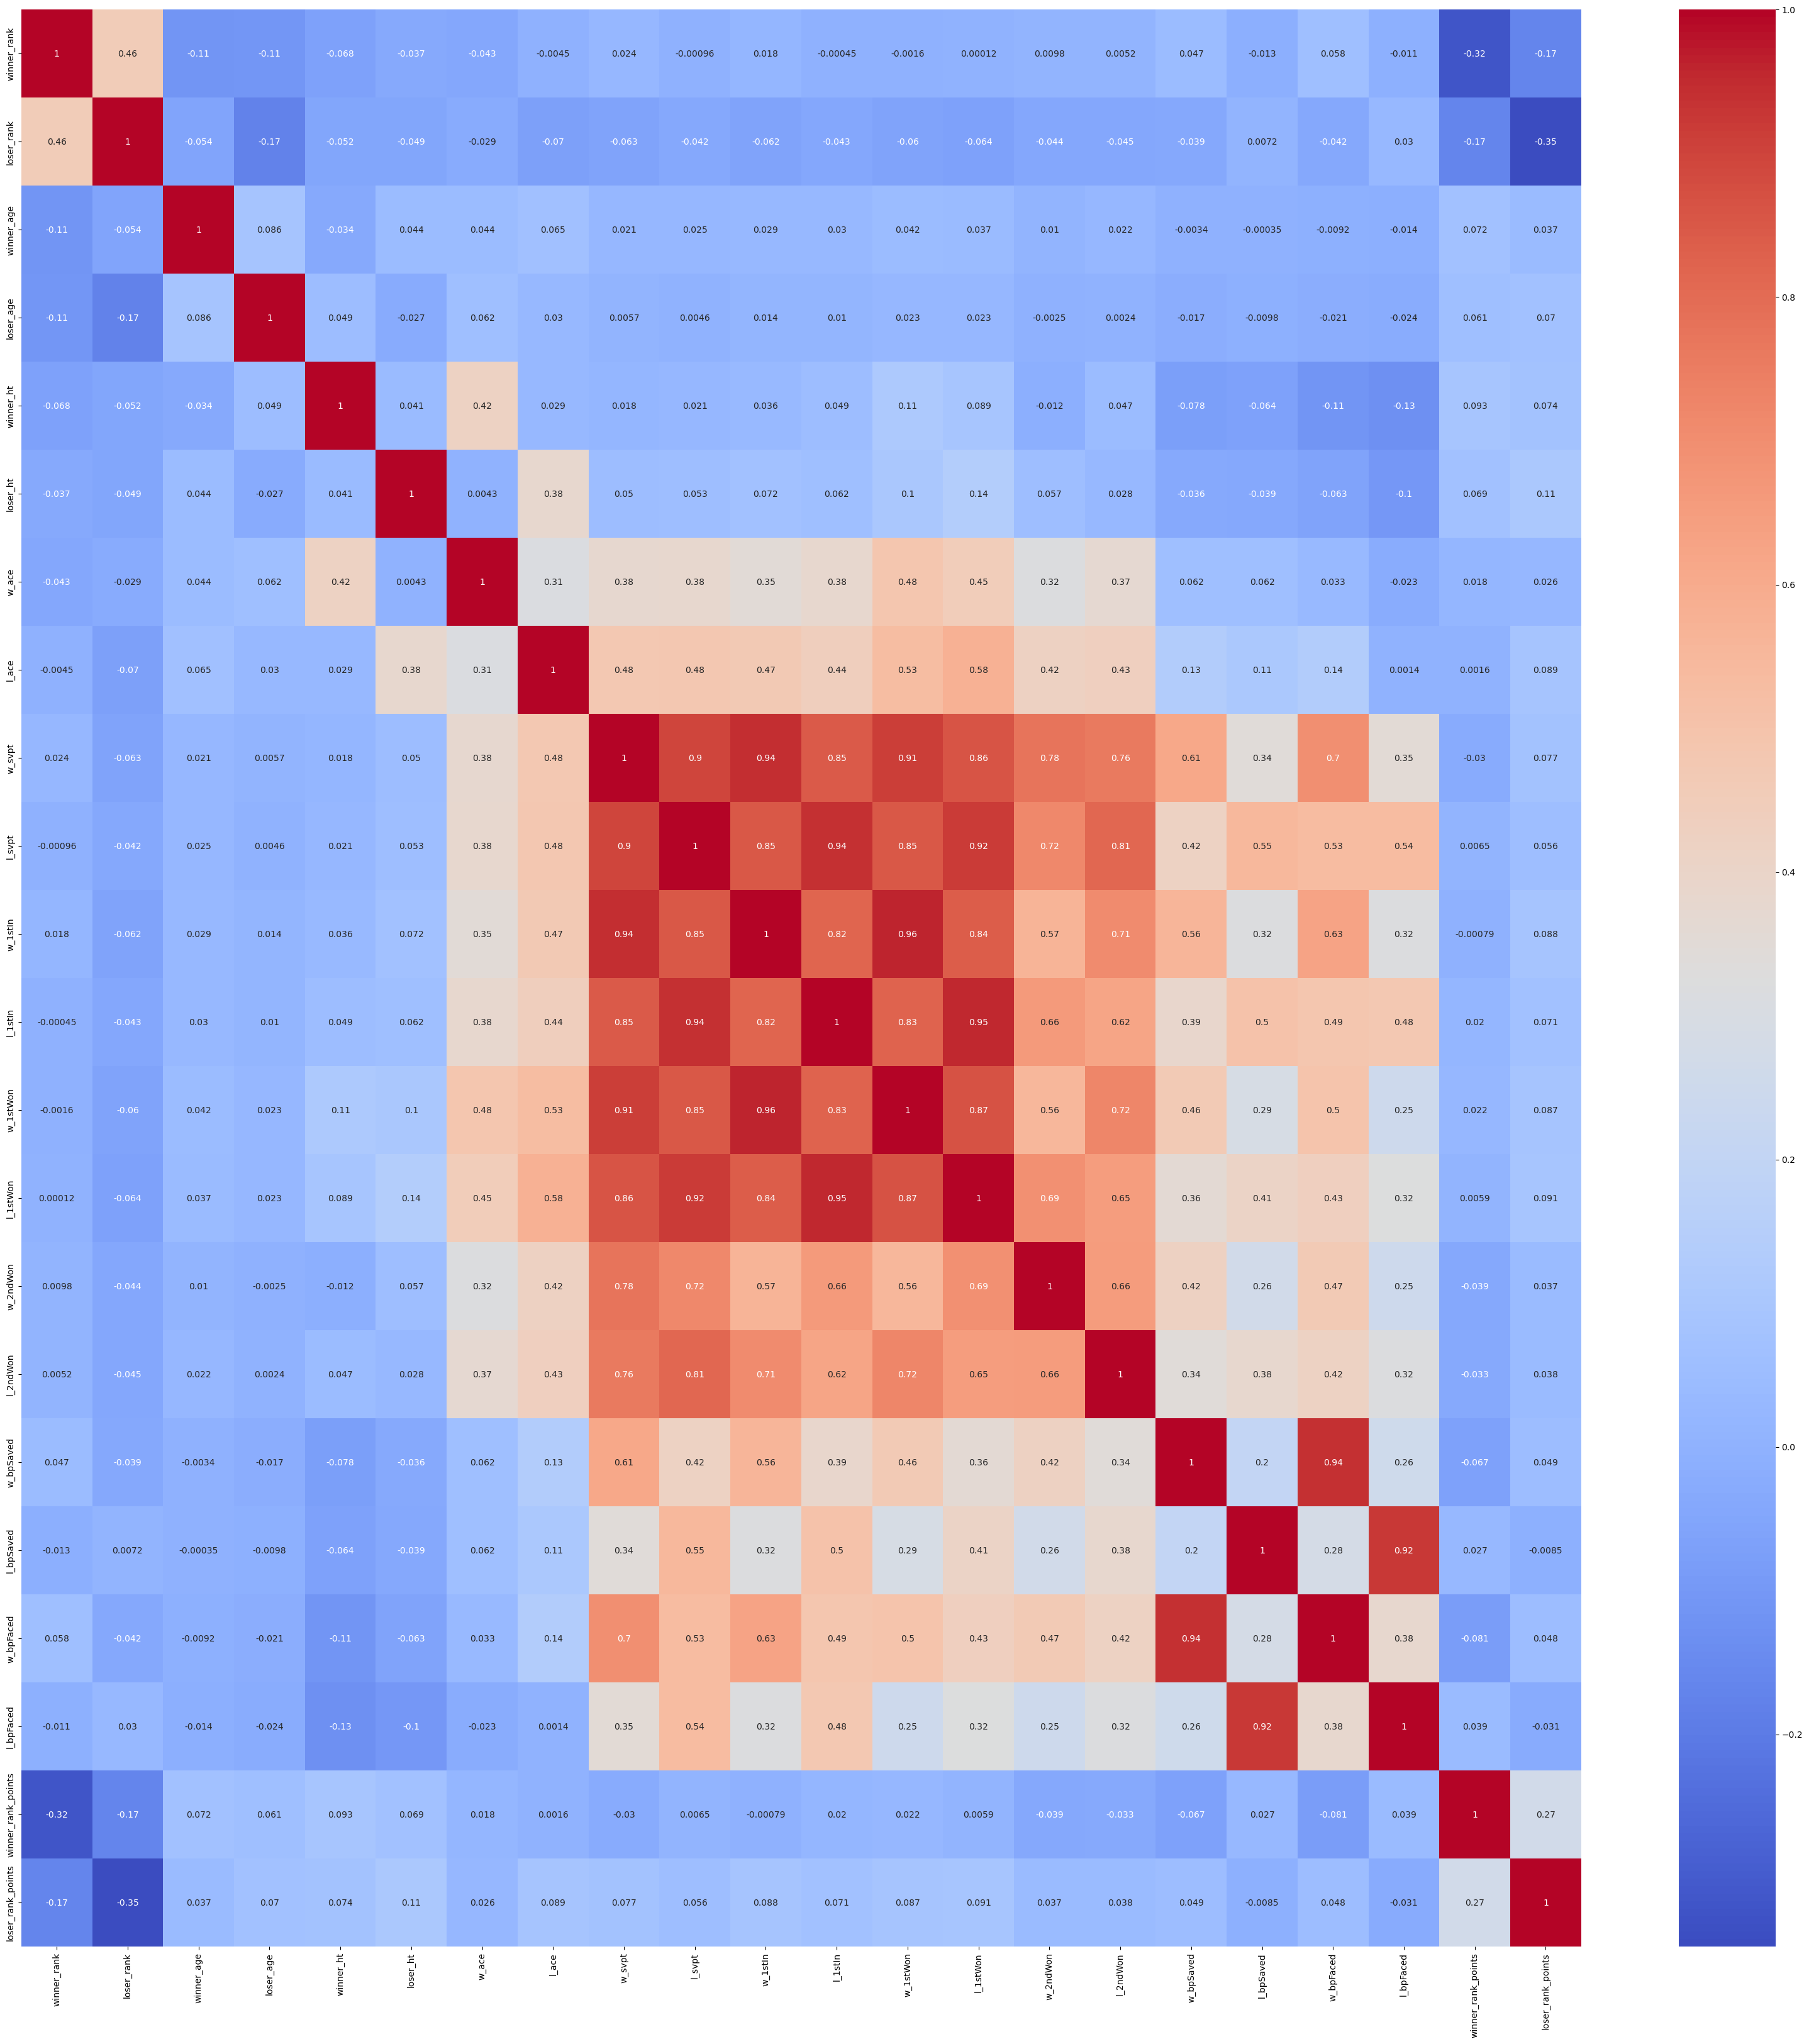

In [7]:
predictors = [
    'winner_rank', 'loser_rank', 'winner_age', 'loser_age', 'winner_ht', 'loser_ht',
    'w_ace', 'l_ace', 'w_svpt', 'l_svpt', 'w_1stIn', 'l_1stIn', 'w_1stWon', 'l_1stWon',
    'w_2ndWon', 'l_2ndWon', 'w_bpSaved', 'l_bpSaved', 'w_bpFaced', 'l_bpFaced',
    'winner_rank_points', 'loser_rank_points',
]

corr_matrix = d[predictors].corr()

plt.figure(figsize=(40, 40))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

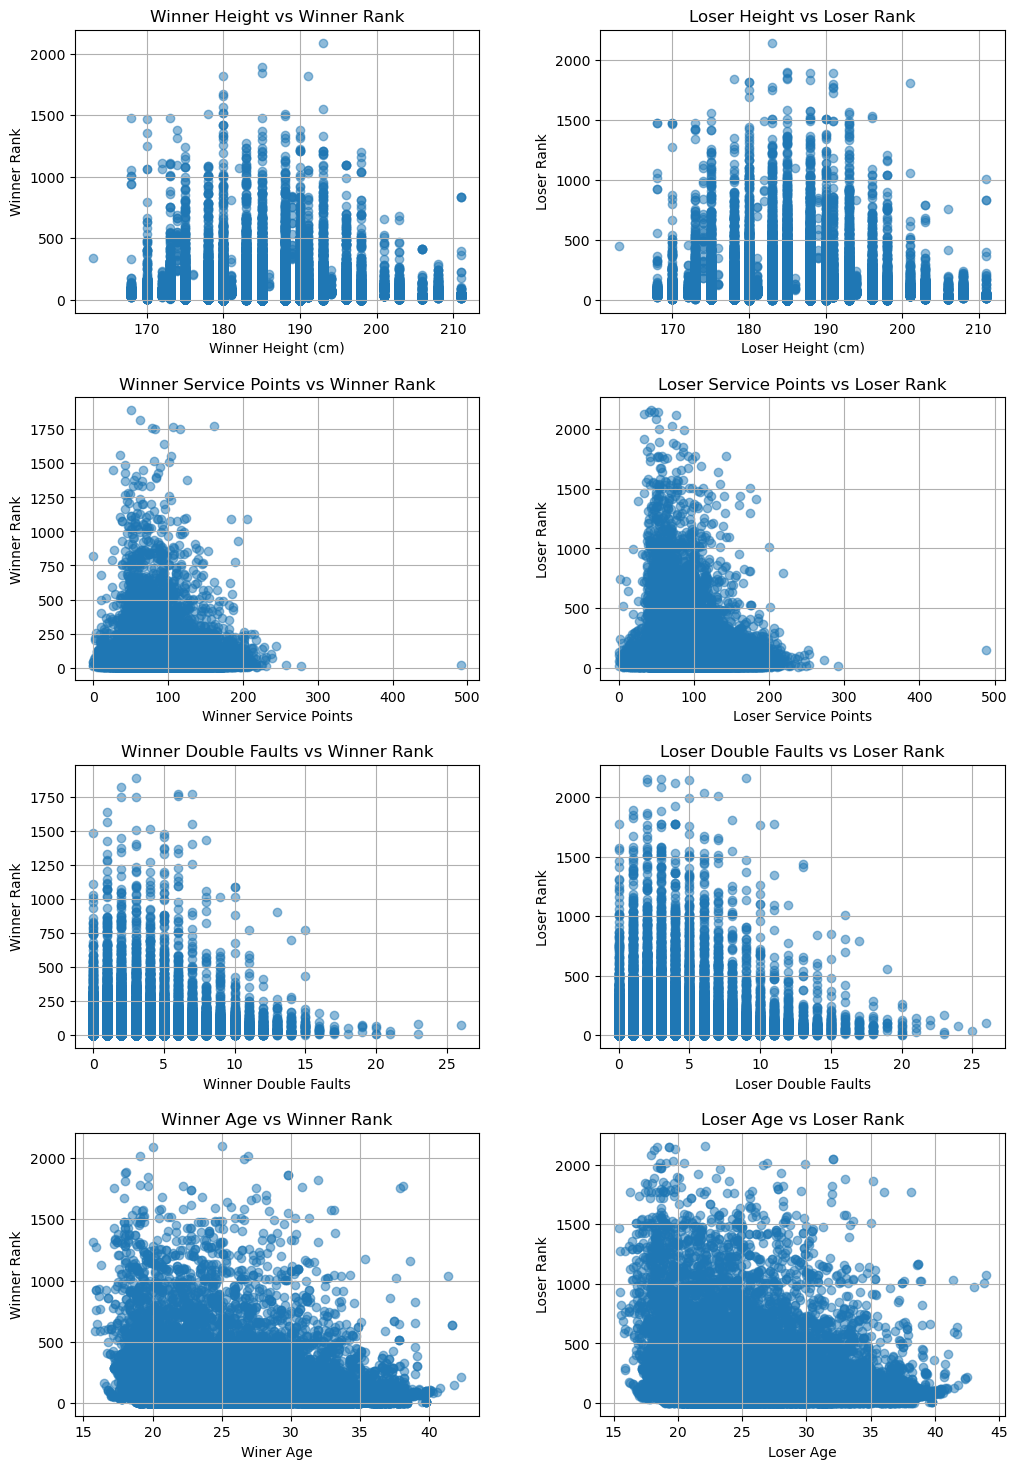

In [8]:
fig, axs = plt.subplots(4, 2, figsize=(12, 18))
fig.subplots_adjust(hspace=0.3, wspace=0.3)

axs[0, 0].scatter(d['winner_ht'], d['winner_rank'], alpha=0.5)
axs[0, 0].set_title('Winner Height vs Winner Rank')
axs[0, 0].set_xlabel('Winner Height (cm)')
axs[0, 0].set_ylabel('Winner Rank')
axs[0, 0].grid(True)

axs[0, 1].scatter(d['loser_ht'], d['loser_rank'], alpha=0.5)
axs[0, 1].set_title('Loser Height vs Loser Rank')
axs[0, 1].set_xlabel('Loser Height (cm)')
axs[0, 1].set_ylabel('Loser Rank')
axs[0, 1].grid(True)

axs[1, 0].scatter(d['w_svpt'], d['winner_rank'], alpha=0.5)
axs[1, 0].set_title('Winner Service Points vs Winner Rank')
axs[1, 0].set_xlabel('Winner Service Points')
axs[1, 0].set_ylabel('Winner Rank')
axs[1, 0].grid(True)

axs[1, 1].scatter(d['l_svpt'], d['loser_rank'], alpha=0.5)
axs[1, 1].set_title('Loser Service Points vs Loser Rank')
axs[1, 1].set_xlabel('Loser Service Points')
axs[1, 1].set_ylabel('Loser Rank')
axs[1, 1].grid(True)

axs[2, 0].scatter(d['w_df'], d['winner_rank'], alpha=0.5)
axs[2, 0].set_title('Winner Double Faults vs Winner Rank')
axs[2, 0].set_xlabel('Winner Double Faults')
axs[2, 0].set_ylabel('Winner Rank')
axs[2, 0].grid(True)

axs[2, 1].scatter(d['l_df'], d['loser_rank'], alpha=0.5)
axs[2, 1].set_title('Loser Double Faults vs Loser Rank')
axs[2, 1].set_xlabel('Loser Double Faults')
axs[2, 1].set_ylabel('Loser Rank')
axs[2, 1].grid(True)

axs[3, 0].scatter(d['winner_age'], d['winner_rank'], alpha=0.5)
axs[3, 0].set_title('Winner Age vs Winner Rank')
axs[3, 0].set_xlabel('Winer Age')
axs[3, 0].set_ylabel('Winner Rank')
axs[3, 0].grid(True)

axs[3, 1].scatter(d['loser_age'], d['loser_rank'], alpha=0.5)
axs[3, 1].set_title('Loser Age vs Loser Rank')
axs[3, 1].set_xlabel('Loser Age')
axs[3, 1].set_ylabel('Loser Rank')
axs[3, 1].grid(True)

plt.show()

# Preprocessing

In [9]:
predictors = [
    'winner_id','loser_id','winner_rank', 'loser_rank', 'winner_age', 'loser_age', 'winner_ht', 'loser_ht',
    'w_ace', 'l_ace', 'w_svpt', 'l_svpt', 'w_1stIn', 'l_1stIn', 'w_1stWon', 'l_1stWon',
    'w_2ndWon', 'l_2ndWon', 'w_bpSaved', 'l_bpSaved', 'w_bpFaced', 'l_bpFaced','w_df','l_df','winner_hand','loser_hand','surface','tourney_date'
]

d = d[predictors]

print(d.columns)

Index(['winner_id', 'loser_id', 'winner_rank', 'loser_rank', 'winner_age',
       'loser_age', 'winner_ht', 'loser_ht', 'w_ace', 'l_ace', 'w_svpt',
       'l_svpt', 'w_1stIn', 'l_1stIn', 'w_1stWon', 'l_1stWon', 'w_2ndWon',
       'l_2ndWon', 'w_bpSaved', 'l_bpSaved', 'w_bpFaced', 'l_bpFaced', 'w_df',
       'l_df', 'winner_hand', 'loser_hand', 'surface', 'tourney_date'],
      dtype='object')


In [41]:
print('Null degerlerin kontrolu:')
print(d.isnull().sum())


d['winner_age'].fillna(d['winner_age'].median(), inplace=True)
d['loser_age'].fillna(d['loser_age'].median(), inplace=True)


d['winner_ht'].fillna(d['winner_ht'].median(), inplace=True)
d['loser_ht'].fillna(d['loser_ht'].median(), inplace=True)


match_stats = ['w_ace', 'l_ace', 'w_df', 'l_df', 'w_svpt', 'l_svpt', 'w_1stIn', 'l_1stIn', 'w_1stWon', 'l_1stWon', 'w_2ndWon', 'l_2ndWon', 'w_bpSaved', 'l_bpSaved', 'w_bpFaced', 'l_bpFaced']

for stat in match_stats:
    d[stat] = d.groupby('winner_id')[stat].transform(lambda x: x.fillna(x.median()))

for stat in ['l_ace', 'l_df', 'l_svpt', 'l_1stIn', 'l_1stWon', 'l_2ndWon', 'l_bpSaved', 'l_bpFaced']:
    d[stat] = d.groupby('loser_id')[stat].transform(lambda x: x.fillna(x.median()))

print('null degerlerini oyuncu bazinda mean veya medianla dolduruldaktan sonra 0 mı kontrolu:')
print(d.isnull().sum())

match_stats = ['w_ace', 'l_ace', 'w_df', 'l_df', 'w_svpt', 'l_svpt', 'w_1stIn', 'l_1stIn', 'w_1stWon', 'l_1stWon', 'w_2ndWon', 'l_2ndWon', 'w_bpSaved', 'l_bpSaved', 'w_bpFaced', 'l_bpFaced']
for stat in match_stats:
    d[stat] = d[stat].fillna(d[stat].median())



d['winner_rank'] = d['winner_rank'].fillna(d['winner_rank'].median())
d['loser_rank'] = d['loser_rank'].fillna(d['loser_rank'].median())

print('null degerlerin genel mean veya medianla dolduruldaktan sonra 0 mı kontrolu:')
print(d.isnull().sum())

Null degerlerin kontrolu:
winner_id        0
loser_id         0
winner_rank      0
loser_rank       0
winner_age       0
loser_age        0
winner_ht        0
loser_ht         0
w_ace            0
l_ace            0
w_svpt           0
l_svpt           0
w_1stIn          0
l_1stIn          0
w_1stWon         0
l_1stWon         0
w_2ndWon         0
l_2ndWon         0
w_bpSaved        0
l_bpSaved        0
w_bpFaced        0
l_bpFaced        0
w_df             0
l_df             0
winner_hand      0
loser_hand       0
surface          0
tourney_year     0
tourney_month    0
dtype: int64


A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


A valu

null degerlerini oyuncu bazinda mean veya medianla dolduruldaktan sonra 0 mı kontrolu:
winner_id        0
loser_id         0
winner_rank      0
loser_rank       0
winner_age       0
loser_age        0
winner_ht        0
loser_ht         0
w_ace            0
l_ace            0
w_svpt           0
l_svpt           0
w_1stIn          0
l_1stIn          0
w_1stWon         0
l_1stWon         0
w_2ndWon         0
l_2ndWon         0
w_bpSaved        0
l_bpSaved        0
w_bpFaced        0
l_bpFaced        0
w_df             0
l_df             0
winner_hand      0
loser_hand       0
surface          0
tourney_year     0
tourney_month    0
dtype: int64
null degerlerin genel mean veya medianla dolduruldaktan sonra 0 mı kontrolu:
winner_id        0
loser_id         0
winner_rank      0
loser_rank       0
winner_age       0
loser_age        0
winner_ht        0
loser_ht         0
w_ace            0
l_ace            0
w_svpt           0
l_svpt           0
w_1stIn          0
l_1stIn          0
w_1stW

In [11]:
d['winner_hand'] = d['winner_hand'].fillna('U')
d['loser_hand'] = d['loser_hand'].fillna('U')


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [12]:
original_size = len(d)
print(f"Data orjinal size: {original_size}")

d = d.dropna(subset=['surface'])

new_size = len(d)
print(f"Surface feature null degerleri cikarinca: {new_size}")
print(f"Droplanan row sayisi: {original_size - new_size}")

Data orjinal size: 73247
Surface feature null degerleri cikarinca: 73194
Droplanan row sayisi: 53


In [13]:
numeric_columns = ['winner_rank', 'loser_rank', 'winner_age', 'loser_age', 'winner_ht',
                    'loser_ht','w_ace', 'l_ace', 'w_svpt', 'l_svpt', 'w_1stIn', 'l_1stIn', 'w_1stWon', 'l_1stWon',
                    'w_2ndWon', 'l_2ndWon', 'w_bpSaved', 'l_bpSaved', 'w_bpFaced', 'l_bpFaced','w_df','l_df',
                   ]
d[numeric_columns] = d[numeric_columns].astype(float)

In [14]:
d.tourney_date

d['tourney_year'] = d.tourney_date.astype(str).str[:4].astype(int)
d['tourney_month'] = d.tourney_date.astype(str).str[4:6].astype(int)

d = d.drop(columns=['tourney_date'])

In [15]:
d

,winner_id,loser_id,winner_rank,loser_rank,winner_age,loser_age,winner_ht,loser_ht,w_ace,l_ace,w_svpt,l_svpt,w_1stIn,l_1stIn,w_1stWon,l_1stWon,w_2ndWon,l_2ndWon,w_bpSaved,l_bpSaved,w_bpFaced,l_bpFaced,w_df,l_df,winner_hand,loser_hand,surface,tourney_year,tourney_month
0,103163,101543,11.0,63.0,21.7,31.1,188.0,180.0,18.0,7.0,96.0,106.0,49.0,55.0,39.0,39.0,28.0,29.0,3.0,4.0,5.0,7.0,4.0,8.0,R,L,Hard,2000,1
1,102607,102644,211.0,49.0,24.5,24.3,190.0,183.0,5.0,5.0,76.0,74.0,52.0,32.0,39.0,25.0,13.0,18.0,5.0,3.0,6.0,6.0,3.0,10.0,R,L,Hard,2000,1
2,103252,102238,48.0,59.0,21.3,26.5,175.0,173.0,0.0,0.0,55.0,56.0,35.0,33.0,25.0,20.0,12.0,7.0,1.0,7.0,1.0,11.0,0.0,6.0,R,R,Hard,2000,1
3,103507,103819,45.0,61.0,19.9,18.4,183.0,185.0,5.0,11.0,53.0,70.0,28.0,43.0,26.0,29.0,15.0,14.0,0.0,6.0,0.0,8.0,1.0,2.0,R,R,Hard,2000,1
4,102103,102765,167.0,34.0,27.3,23.7,180.0,185.0,1.0,8.0,98.0,92.0,66.0,46.0,39.0,34.0,14.0,18.0,6.0,5.0,11.0,9.0,2.0,8.0,R,R,Hard,2000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73242,212051,209943,1109.0,740.0,18.8,21.8,185.0,185.0,0.0,1.0,36.0,61.0,22.0,30.0,15.0,17.0,10.0,7.0,1.0,8.0,1.0,14.0,0.0,1.0,U,U,Clay,2024,2
73243,122533,202475,554.0,748.0,26.9,23.2,185.0,185.0,1.0,2.0,86.0,56.0,60.0,41.0,40.0,25.0,13.0,6.0,8.0,1.0,9.0,4.0,1.0,1.0,R,R,Hard,2024,2
73244,144748,144775,416.0,68.0,27.3,26.4,185.0,183.0,4.0,0.0,76.0,71.0,46.0,51.0,32.0,25.0,10.0,7.0,6.0,5.0,11.0,12.0,2.0,2.0,U,R,Hard,2024,2
73245,122533,144748,554.0,416.0,26.9,27.3,185.0,185.0,0.0,5.0,84.0,86.0,61.0,51.0,41.0,32.0,13.0,17.0,2.0,5.0,5.0,9.0,1.0,3.0,R,U,Hard,2024,2


# Feature Engineering

In [16]:
df1 = d.copy()
df1['first_player_id'] = df1['loser_id']
df1['second_player_id'] = df1['winner_id']
df1['first_player_hand'] = df1['loser_hand']
df1['second_player_hand'] = df1['winner_hand']
df1['first_player_age'] = df1['loser_age']
df1['second_player_age'] = df1['winner_age']
df1['first_player_ht'] = df1['loser_ht']
df1['second_player_ht'] = df1['winner_ht']
df1['first_player_rank'] = df1['loser_rank']
df1['second_player_rank'] = df1['winner_rank']
df1['first_player_ace'] = df1['l_ace']
df1['second_player_ace'] = df1['w_ace']
df1['first_player_svpt'] = df1['l_svpt']
df1['second_player_svpt'] = df1['w_svpt']
df1['first_player_1stIn'] = df1['l_1stIn']
df1['second_player_1stIn'] = df1['w_1stIn']
df1['first_player_1stWon'] = df1['l_1stWon']
df1['second_player_1stWon'] = df1['w_1stWon']
df1['first_player_2ndWon'] = df1['l_2ndWon']
df1['second_player_2ndWon'] = df1['w_2ndWon']
df1['first_player_bpSaved'] = df1['l_bpSaved']
df1['second_player_bpSaved'] = df1['w_bpSaved']
df1['first_player_bpFaced'] = df1['l_bpFaced']
df1['second_player_bpFaced'] = df1['w_bpFaced']
df1['first_player_df'] = df1['l_df']
df1['second_player_df'] = df1['w_df']
df1['tourney_year'] = df1['tourney_year']
df1['surface'] = df1['surface']
df1['label'] = 0

df2 = d.copy()
df2['first_player_id'] = df2['winner_id']
df2['second_player_id'] = df2['loser_id']

df2['first_player_hand'] = df2['winner_hand']
df2['second_player_hand'] = df2['loser_hand']
df2['first_player_age'] = df2['winner_age']
df2['second_player_age'] = df2['loser_age']
df2['first_player_ht'] = df2['winner_ht']
df2['second_player_ht'] = df2['loser_ht']
df2['first_player_rank'] = df2['winner_rank']
df2['second_player_rank'] = df2['loser_rank']
df2['first_player_ace'] = df2['w_ace']
df2['second_player_ace'] = df2['l_ace']
df2['first_player_svpt'] = df2['w_svpt']
df2['second_player_svpt'] = df2['l_svpt']
df2['first_player_1stIn'] = df2['w_1stIn']
df2['second_player_1stIn'] = df2['l_1stIn']
df2['first_player_1stWon'] = df2['w_1stWon']
df2['second_player_1stWon'] = df2['l_1stWon']
df2['first_player_2ndWon'] = df2['w_2ndWon']
df2['second_player_2ndWon'] = df2['l_2ndWon']
df2['first_player_bpSaved'] = df2['w_bpSaved']
df2['second_player_bpSaved'] = df2['l_bpSaved']
df2['first_player_bpFaced'] = df2['w_bpFaced']
df2['second_player_bpFaced'] = df2['l_bpFaced']
df2['first_player_df'] = df2['w_df']
df2['second_player_df'] = df2['l_df']
df2['label'] = 1

combined_df = pd.concat([df1, df2], ignore_index=True)

combined_df = combined_df.sample(frac=1).reset_index(drop=True)
combined_df

,winner_id,loser_id,winner_rank,loser_rank,winner_age,loser_age,winner_ht,loser_ht,w_ace,l_ace,w_svpt,l_svpt,w_1stIn,l_1stIn,w_1stWon,l_1stWon,w_2ndWon,l_2ndWon,w_bpSaved,l_bpSaved,w_bpFaced,l_bpFaced,w_df,l_df,winner_hand,loser_hand,surface,tourney_year,tourney_month,first_player_id,second_player_id,first_player_hand,second_player_hand,first_player_age,second_player_age,first_player_ht,second_player_ht,first_player_rank,second_player_rank,first_player_ace,second_player_ace,first_player_svpt,second_player_svpt,first_player_1stIn,second_player_1stIn,first_player_1stWon,second_player_1stWon,first_player_2ndWon,second_player_2ndWon,first_player_bpSaved,second_player_bpSaved,first_player_bpFaced,second_player_bpFaced,first_player_df,second_player_df,label
0,104604,105812,925.0,740.0,31.3,25.5,185.0,185.0,9.0,2.0,86.0,91.0,58.0,64.0,41.0,36.0,19.0,12.0,4.0,8.0,5.0,13.00,2.0,5.0,R,U,Clay,2017,2,104604,105812,R,U,31.3,25.5,185.0,185.0,925.0,740.0,9.0,2.0,86.0,91.0,58.0,64.0,41.0,36.0,19.0,12.0,4.0,8.0,5.0,13.00,2.0,5.0,1
1,104026,103507,11.0,63.0,22.6,24.9,198.0,183.0,17.0,6.0,74.0,69.0,40.0,34.0,36.0,28.0,19.0,19.0,4.0,2.0,4.0,3.00,7.0,4.0,R,R,Hard,2005,2,103507,104026,R,R,24.9,22.6,183.0,198.0,63.0,11.0,6.0,17.0,69.0,74.0,34.0,40.0,28.0,36.0,19.0,19.0,2.0,4.0,3.0,4.00,4.0,7.0,0
2,105137,104523,157.0,102.0,21.4,24.4,183.0,178.0,3.0,6.0,112.0,94.0,59.0,55.0,40.0,36.0,29.0,19.0,7.0,3.0,10.0,8.00,2.0,6.0,R,R,Clay,2009,9,104523,105137,R,R,24.4,21.4,178.0,183.0,102.0,157.0,6.0,3.0,94.0,112.0,55.0,59.0,36.0,40.0,19.0,29.0,3.0,7.0,8.0,10.00,6.0,2.0,0
3,108594,108740,45.0,68.0,31.9,28.8,185.0,185.0,6.0,3.0,73.0,68.0,45.0,40.0,34.0,20.0,16.0,11.0,3.0,3.0,4.0,9.25,2.0,3.0,U,U,Hard,2012,2,108594,108740,U,U,31.9,28.8,185.0,185.0,45.0,68.0,6.0,3.0,73.0,68.0,45.0,40.0,34.0,20.0,16.0,11.0,3.0,3.0,4.0,9.25,2.0,3.0,1
4,105023,104368,36.0,463.0,21.2,24.6,198.0,190.0,8.0,1.0,63.0,71.0,37.0,27.0,28.0,21.0,17.0,21.0,0.0,1.0,1.0,4.00,6.0,9.0,R,R,Hard,2009,1,105023,104368,R,R,21.2,24.6,198.0,190.0,36.0,463.0,8.0,1.0,63.0,71.0,37.0,27.0,28.0,21.0,17.0,21.0,0.0,1.0,1.0,4.00,6.0,9.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146383,105916,105023,80.0,13.0,25.9,30.2,188.0,198.0,14.0,19.0,130.0,144.0,73.0,84.0,60.0,63.0,30.0,29.0,10.0,12.0,12.0,16.00,7.0,5.0,R,R,Hard,2018,1,105916,105023,R,R,25.9,30.2,188.0,198.0,80.0,13.0,14.0,19.0,130.0,144.0,73.0,84.0,60.0,63.0,30.0,29.0,10.0,12.0,12.0,16.00,7.0,5.0,1
146384,210506,106005,74.0,104.0,19.4,31.7,185.0,180.0,4.0,2.0,70.0,71.0,42.0,43.0,29.0,28.0,13.0,10.0,5.0,7.0,8.0,11.00,1.0,6.0,U,R,Hard,2024,2,106005,210506,R,U,31.7,19.4,180.0,185.0,104.0,74.0,2.0,4.0,71.0,70.0,43.0,42.0,28.0,29.0,10.0,13.0,7.0,5.0,11.0,8.00,6.0,1.0,0
146385,208363,105948,113.0,85.0,22.9,31.9,185.0,180.0,0.0,0.0,72.0,97.0,51.0,61.0,30.0,34.0,7.0,13.0,8.0,14.0,14.0,21.00,0.0,0.0,R,R,Clay,2024,2,105948,208363,R,R,31.9,22.9,180.0,185.0,85.0,113.0,0.0,0.0,97.0,72.0,61.0,51.0,34.0,30.0,13.0,7.0,14.0,8.0,21.0,14.00,0.0,0.0,0
146386,207989,132283,2.0,46.0,20.6,28.6,185.0,191.0,12.0,10.0,130.0,142.0,89.0,103.0,69.0,67.0,29.0,26.0,3.0,3.0,4.0,6.00,4.0,2.0,R,R,Hard,2024,1,132283,207989,R,R,28.6,20.6,191.0,185.0,46.0,2.0,10.0,12.0,142.0,130.0,103.0,89.0,67.0,69.0,26.0,29.0,3.0,3.0,6.0,4.00,2.0,4.0,0


In [17]:
columns_to_drop = ['winner_id', 'loser_id', 'winner_hand', 'loser_hand', 'winner_age', 'loser_age',
                   'winner_ht', 'loser_ht', 'winner_rank', 'loser_rank',
                   'w_ace', 'l_ace', 'w_df', 'l_df', 'w_svpt', 'l_svpt', 'w_1stIn', 'l_1stIn', 'w_1stWon', 'l_1stWon',
                   'w_2ndWon', 'l_2ndWon', 'w_bpSaved', 'l_bpSaved', 'w_bpFaced', 'l_bpFaced']

combined_df.drop(columns=columns_to_drop, inplace=True)
combined_df

,surface,tourney_year,tourney_month,first_player_id,second_player_id,first_player_hand,second_player_hand,first_player_age,second_player_age,first_player_ht,second_player_ht,first_player_rank,second_player_rank,first_player_ace,second_player_ace,first_player_svpt,second_player_svpt,first_player_1stIn,second_player_1stIn,first_player_1stWon,second_player_1stWon,first_player_2ndWon,second_player_2ndWon,first_player_bpSaved,second_player_bpSaved,first_player_bpFaced,second_player_bpFaced,first_player_df,second_player_df,label
0,Clay,2017,2,104604,105812,R,U,31.3,25.5,185.0,185.0,925.0,740.0,9.0,2.0,86.0,91.0,58.0,64.0,41.0,36.0,19.0,12.0,4.0,8.0,5.0,13.00,2.0,5.0,1
1,Hard,2005,2,103507,104026,R,R,24.9,22.6,183.0,198.0,63.0,11.0,6.0,17.0,69.0,74.0,34.0,40.0,28.0,36.0,19.0,19.0,2.0,4.0,3.0,4.00,4.0,7.0,0
2,Clay,2009,9,104523,105137,R,R,24.4,21.4,178.0,183.0,102.0,157.0,6.0,3.0,94.0,112.0,55.0,59.0,36.0,40.0,19.0,29.0,3.0,7.0,8.0,10.00,6.0,2.0,0
3,Hard,2012,2,108594,108740,U,U,31.9,28.8,185.0,185.0,45.0,68.0,6.0,3.0,73.0,68.0,45.0,40.0,34.0,20.0,16.0,11.0,3.0,3.0,4.0,9.25,2.0,3.0,1
4,Hard,2009,1,105023,104368,R,R,21.2,24.6,198.0,190.0,36.0,463.0,8.0,1.0,63.0,71.0,37.0,27.0,28.0,21.0,17.0,21.0,0.0,1.0,1.0,4.00,6.0,9.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146383,Hard,2018,1,105916,105023,R,R,25.9,30.2,188.0,198.0,80.0,13.0,14.0,19.0,130.0,144.0,73.0,84.0,60.0,63.0,30.0,29.0,10.0,12.0,12.0,16.00,7.0,5.0,1
146384,Hard,2024,2,106005,210506,R,U,31.7,19.4,180.0,185.0,104.0,74.0,2.0,4.0,71.0,70.0,43.0,42.0,28.0,29.0,10.0,13.0,7.0,5.0,11.0,8.00,6.0,1.0,0
146385,Clay,2024,2,105948,208363,R,R,31.9,22.9,180.0,185.0,85.0,113.0,0.0,0.0,97.0,72.0,61.0,51.0,34.0,30.0,13.0,7.0,14.0,8.0,21.0,14.00,0.0,0.0,0
146386,Hard,2024,1,132283,207989,R,R,28.6,20.6,191.0,185.0,46.0,2.0,10.0,12.0,142.0,130.0,103.0,89.0,67.0,69.0,26.0,29.0,3.0,3.0,6.0,4.00,2.0,4.0,0


In [18]:
combined_df = pd.get_dummies(combined_df, columns=['surface', 'first_player_hand', 'second_player_hand'])

print('Cleaning ve preprocessingden sonra datanin son hali: ', combined_df.shape)

Cleaning ve preprocessingden sonra datanin son hali:  (146388, 39)


# MODELLER


In [19]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

y = combined_df['label']
df_X = combined_df.drop(columns='label')

X_train_1, X_test_1, y_train, y_test = train_test_split(df_X, y, test_size=0.2, random_state=42)

In [20]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train_1)

X_test = scaler.transform(X_test_1)


#### RANDOM FOREST

In [21]:
RF_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

RF_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

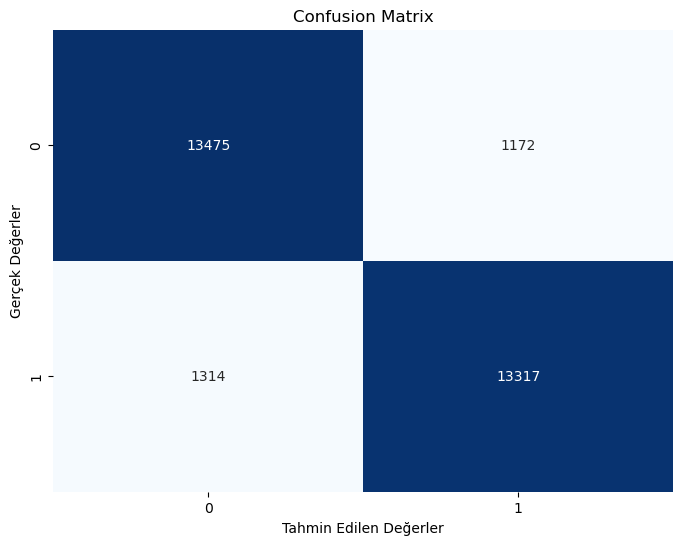

Macro Precision: 0.915130614474561
Macro Recall: 0.9150871526952952
Macro F1 Score: 0.9150873556563017
Accuracy: 0.9150898285402008


In [42]:
RF_predictions = RF_classifier.predict(X_test)

rf_confmatrix = confusion_matrix(y_test, RF_predictions)

plt.figure(figsize=(8, 6))
sns.heatmap(rf_confmatrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Tahmin Edilen Değerler')
plt.ylabel('Gerçek Değerler')
plt.title('Confusion Matrix')
plt.show()

precision = precision_score(y_test, RF_predictions, average='macro')
print('Macro Precision:', precision)

recall = recall_score(y_test, RF_predictions, average='macro')
print('Macro Recall:', recall)

f1 = f1_score(y_test, RF_predictions, average='macro')
print('Macro F1 Score:', f1)

print('Accuracy:', accuracy_score(y_test, RF_predictions))

In [23]:
scores = cross_val_score(RF_classifier, df_X, y, cv=5, scoring='accuracy', n_jobs=-1)
print("Accuracy scores for each fold:")
print(scores)
print("\nAverage Cross-Validation Accuracy:", scores.mean())

Accuracy scores for each fold:
[0.91348453 0.91601202 0.91430426 0.91232025 0.91594084]

Average Cross-Validation Accuracy: 0.9144123796782043


#### XGBOOST

In [24]:
XGB_classifier = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

XGB_classifier.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

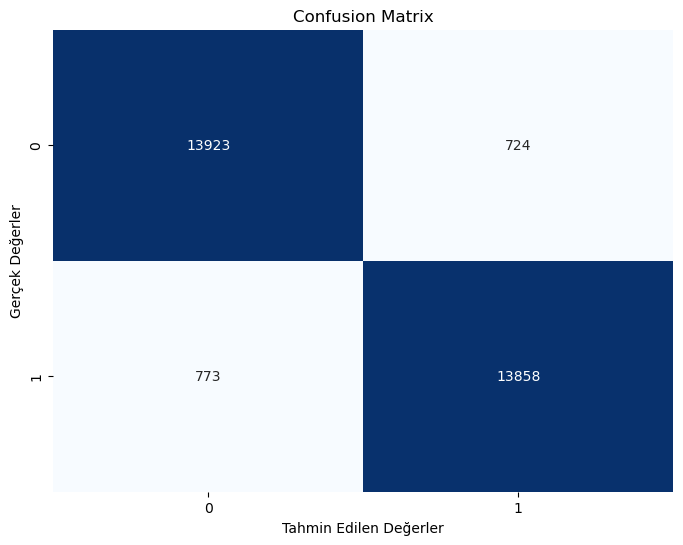

Macro Precision: 0.9488751997507461
Macro Recall: 0.9488685284217835
Macro F1 Score: 0.9488692062813062
Accuracy: 0.9488694582963317


In [25]:
XGB_predictions = XGB_classifier.predict(X_test)

xgb_confmatrix = confusion_matrix(y_test, XGB_predictions)

plt.figure(figsize=(8, 6))
sns.heatmap(xgb_confmatrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Tahmin Edilen Değerler')
plt.ylabel('Gerçek Değerler')
plt.title('Confusion Matrix')
plt.show()

precision = precision_score(y_test, XGB_predictions, average='macro')
print('Macro Precision:', precision)

recall = recall_score(y_test, XGB_predictions, average='macro')
print('Macro Recall:', recall)

f1 = f1_score(y_test, XGB_predictions, average='macro')
print('Macro F1 Score:', f1)

print('Accuracy:', accuracy_score(y_test, XGB_predictions))

[04:53:24] WARNING: C:\b\abs_0fh_d4x2ng\croot\xgboost-split_1713973188995\work\cpp_src\src\c_api\c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


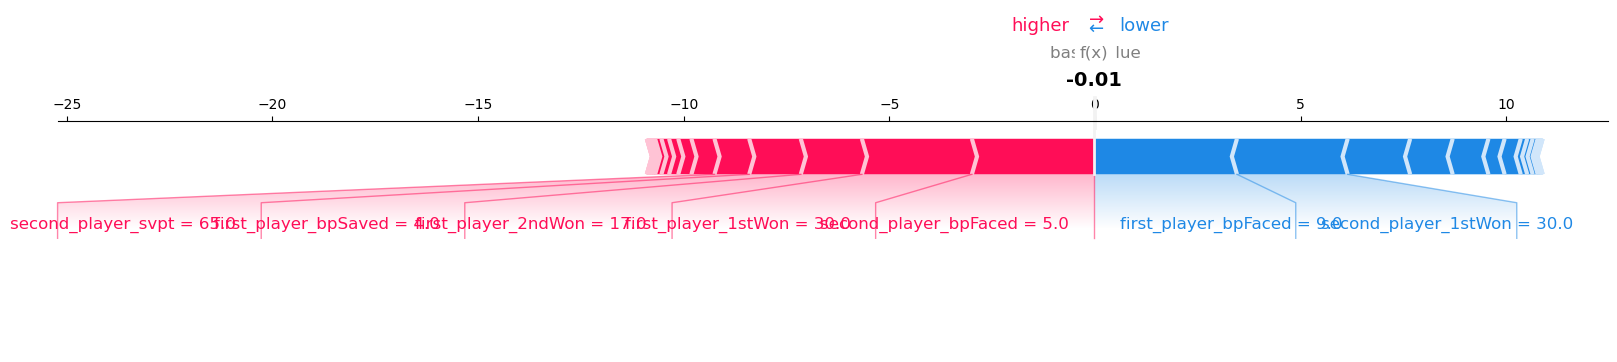

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


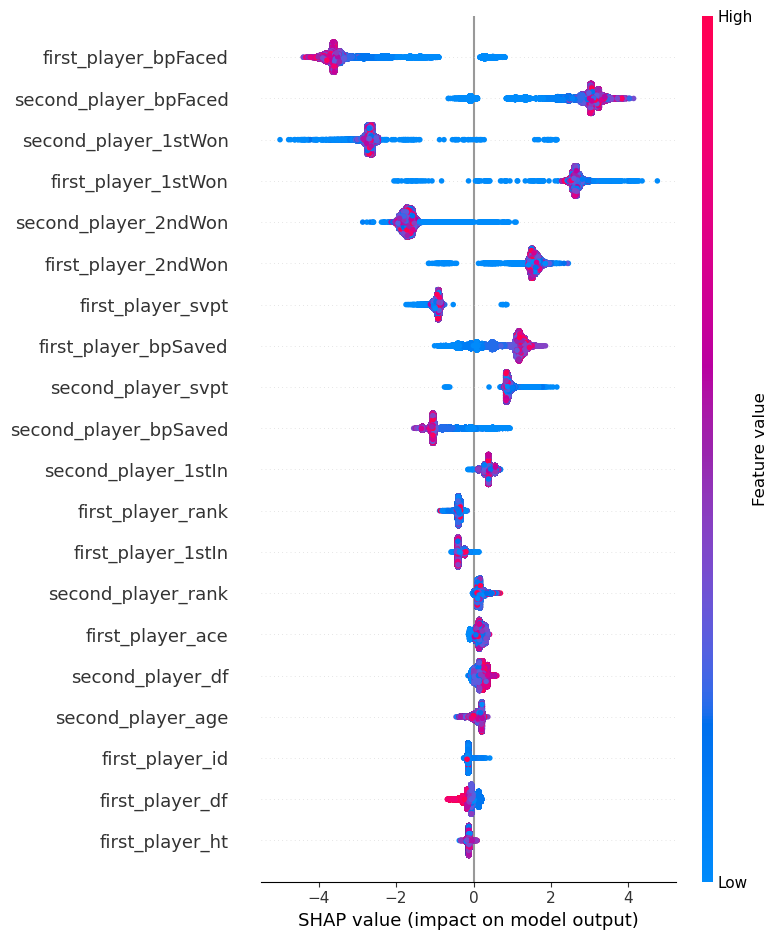

In [26]:
explainer = shap.TreeExplainer(XGB_classifier)
shap_values = explainer.shap_values(X_train_1)
shap.force_plot(explainer.expected_value, shap_values[0,:], X_train_1.iloc[0,:], matplotlib=True)
shap.summary_plot(shap_values, X_train_1)

In [27]:
scores = cross_val_score(XGB_classifier, X_train, y_train, cv=5,
                         scoring='accuracy', n_jobs=-1)

print("Accuracy scores for each fold:")
print(scores)
print("\nAverage Cross-Validation Accuracy:", scores.mean())

Accuracy scores for each fold:
[0.94633251 0.94466741 0.94650329 0.94671676 0.94573478]

Average Cross-Validation Accuracy: 0.9459909486807275


### DESICION TREE

In [28]:
DT_classifier = DecisionTreeClassifier(max_depth=5, min_samples_split=20, min_samples_leaf=10, random_state=42)
DT_classifier.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=10, min_samples_split=20,
                       random_state=42)

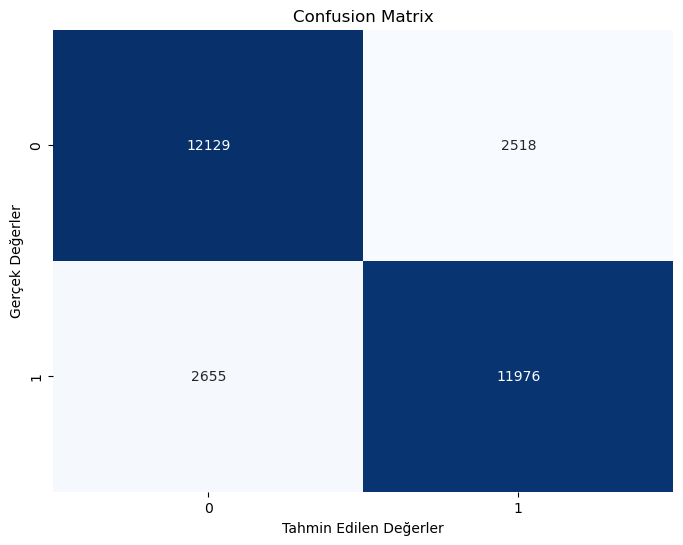

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.83      0.82     14647
           1       0.83      0.82      0.82     14631

    accuracy                           0.82     29278
   macro avg       0.82      0.82      0.82     29278
weighted avg       0.82      0.82      0.82     29278

Accuracy: 0.8233144340460414


In [29]:
dt_predictions = DT_classifier.predict(X_test)

dt_confmatrix = confusion_matrix(y_test, dt_predictions)

plt.figure(figsize=(8, 6))
sns.heatmap(dt_confmatrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Tahmin Edilen Değerler')
plt.ylabel('Gerçek Değerler')
plt.title('Confusion Matrix')
plt.show()

print('Classification Report:')
print(classification_report(y_test, dt_predictions))

print('Accuracy:', accuracy_score(y_test, dt_predictions))

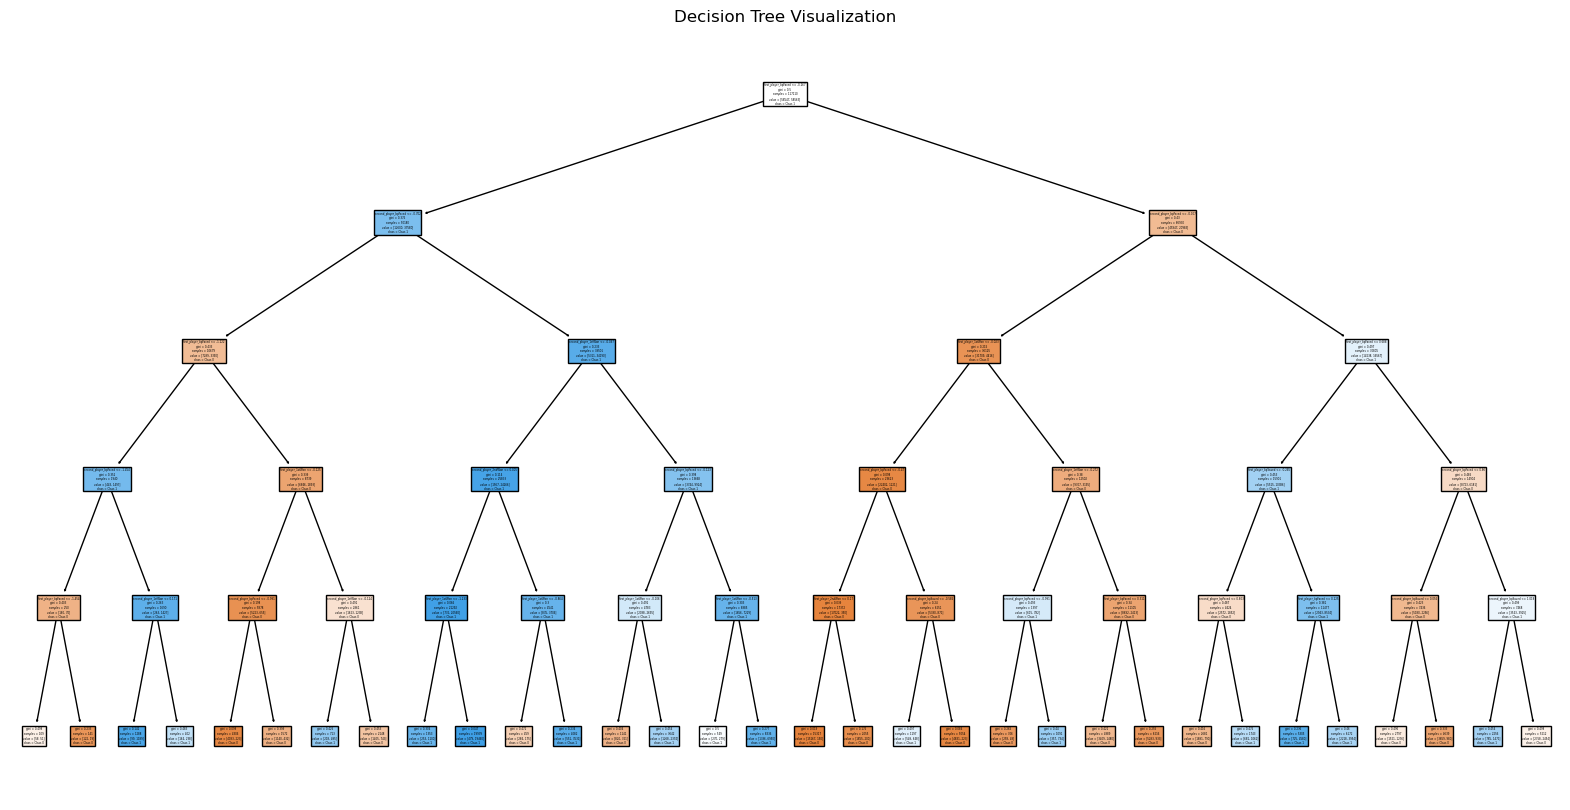

In [30]:
plt.figure(figsize=(20,10))
plot_tree(DT_classifier, filled=True, feature_names=combined_df.drop(columns='label').columns, class_names=['Class 0', 'Class 1'])
plt.title('Decision Tree Visualization')
plt.show()

In [31]:
scores = cross_val_score(DT_classifier, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1)

print("Accuracy scores for each fold:")
print(scores)
print("\nAverage Cross-Validation Accuracy:", scores.mean())

Accuracy scores for each fold:
[0.82277346 0.82405431 0.82307233 0.82115105 0.82691487]

Average Cross-Validation Accuracy: 0.8235932029715652


### SVM MODELİ

In [34]:
svm_classifier = SVC(C=1.0)

svm_classifier.fit(X_train, y_train)

SVC()

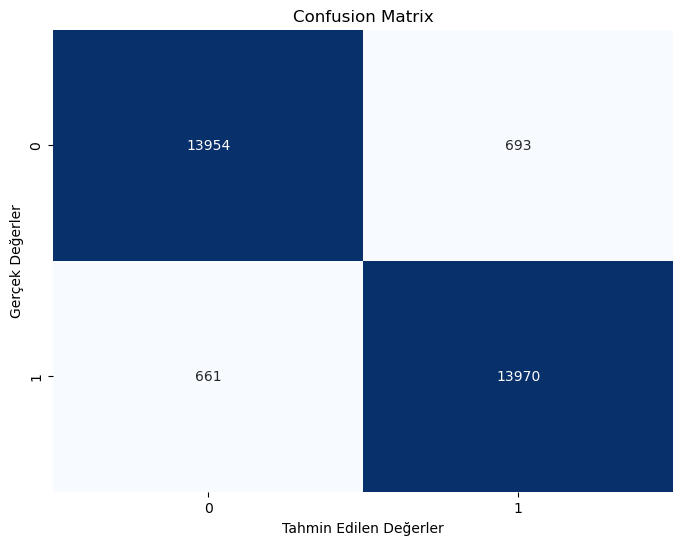

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95     14647
           1       0.95      0.95      0.95     14631

    accuracy                           0.95     29278
   macro avg       0.95      0.95      0.95     29278
weighted avg       0.95      0.95      0.95     29278

Accuracy: 0.9537536716988866


In [35]:
svm_predictions = svm_classifier.predict(X_test)

svm_confmatrix = confusion_matrix(y_test, svm_predictions)

plt.figure(figsize=(8, 6))
sns.heatmap(svm_confmatrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Tahmin Edilen Değerler')
plt.ylabel('Gerçek Değerler')
plt.title('Confusion Matrix')
plt.show()

print('Classification Report:')
print(classification_report(y_test, svm_predictions))

print('Accuracy:', accuracy_score(y_test, svm_predictions))


In [36]:
pipeline = make_pipeline(StandardScaler(), SVC())

param_grid = {
    'svc__C': [1, 10],
    'svc__kernel': ['rbf']
}

grid_search = GridSearchCV(pipeline, param_grid, cv=3, verbose=2, n_jobs=-1)

grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))




Fitting 3 folds for each of 2 candidates, totalling 6 fits
Best parameters: {'svc__C': 1, 'svc__kernel': 'rbf'}
Best cross-validation score: 0.95


# ROC CURVELER

In [39]:
RF_probabilities = RF_classifier.predict_proba(X_test)[:, 1]

fpr_rf, tpr_rf, _ = roc_curve(y_test, RF_probabilities)
roc_auc_rf = auc(fpr_rf, tpr_rf)

XGB_probabilities = XGB_classifier.predict_proba(X_test)[:, 1]

fpr_xgb, tpr_xgb, _ = roc_curve(y_test, XGB_probabilities)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

DT_probabilities = DT_classifier.predict_proba(X_test)[:, 1]

fpr_dt, tpr_dt, _ = roc_curve(y_test, DT_probabilities)
roc_auc_dt = auc(fpr_dt, tpr_dt)

svm_scores = svm_classifier.decision_function(X_test)
fpr_svm, tpr_svm, _ = roc_curve(y_test, svm_scores)
roc_auc_svm = auc(fpr_svm, tpr_svm)

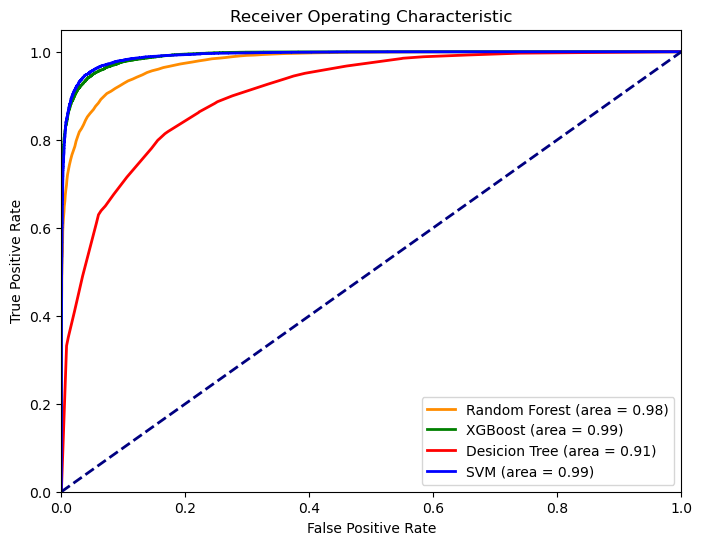

In [40]:
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='darkorange',
         lw=2, label='Random Forest (area = %0.2f)' % roc_auc_rf)
plt.plot(fpr_xgb, tpr_xgb, color='green',
         lw=2, label='XGBoost (area = %0.2f)' % roc_auc_xgb)
plt.plot(fpr_dt, tpr_dt, color='red',
         lw=2, label='Desicion Tree (area = %0.2f)' % roc_auc_dt)
plt.plot(fpr_svm, tpr_svm, color='blue', lw=2, label='SVM (area = %0.2f)' % roc_auc_svm)

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()